In [22]:
import pandas as pd

In [23]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

In [25]:
import numpy as np

In [26]:
data = pd.read_csv("dpwh_flood_control_projects_(cleaned).csv")

In [25]:
print(data.shape)
print(data.columns.tolist())
display(data.head())

(9855, 24)
['Region', 'Province', 'TypeOfWork', 'FundingYear', 'ApprovedBudgetForContract', 'ContractCost', 'ActualCompletionDate', 'StartDate', 'Contractor', 'ContractId', 'ProjectId', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23']


Region Province                                  TypeOfWork  FundingYear  \
0    XIV   Apayao  Construction of Flood Mitigation Structure         2021   
1    XIV   Apayao  Construction of Flood Mitigation Structure         2021   
2    XIV   Apayao  Construction of Flood Mitigation Structure         2021   
3    XIV   Apayao  Construction of Flood Mitigation Structure         2021   
4    XIV   Apayao  Construction of Flood Mitigation Structure         2021   

  ApprovedBudgetForContract ContractCost ActualCompletionDate  StartDate  \
0                  96500000   92692943.8            10/3/2022  3/18/2021   
1                  49000000   47521251.3           11/24/2022  12/1/2021   
2                  47423180  45942583.67           11/28/2022  12/1/2021   
3                   9900000      9900000           12/15/2022  12/1/2021   
4                   4950000      4950000            9/23/2022  12/1/2021   

                                         Contractor ContractId  ...  \
0              ASC CONSTRUCTION & CONCRETE PRODUCTS   21PC0018  ...   
1              ASC CONSTRUCTION & CONCRETE PRODUCTS   21PC0019  ...   
2              ASC CONSTRUCTION & CONCRETE PRODUCTS   21PC0010  ...   
3              ASC CONSTRUCTION & CONCRETE PRODUCTS   21PC0067  ...   
4  ALEPHNORTH PEAK CONSTRUCTION AND DEVELOPMENT CO.   21PC0034  ...   

  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
0         NaN          NaN          NaN          NaN          NaN   
1         NaN          NaN          NaN          NaN          NaN   
2         NaN          NaN          NaN          NaN          NaN   
3         NaN          NaN          NaN          NaN          NaN   
4         NaN          NaN          NaN          NaN          NaN   

   Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 24 columns]

In [26]:
#drop empty columns
data = data.dropna(axis=1, how='all')
display(data.head())

Region Province                                  TypeOfWork  FundingYear  \
0    XIV   Apayao  Construction of Flood Mitigation Structure         2021   
1    XIV   Apayao  Construction of Flood Mitigation Structure         2021   
2    XIV   Apayao  Construction of Flood Mitigation Structure         2021   
3    XIV   Apayao  Construction of Flood Mitigation Structure         2021   
4    XIV   Apayao  Construction of Flood Mitigation Structure         2021   

  ApprovedBudgetForContract ContractCost ActualCompletionDate  StartDate  \
0                  96500000   92692943.8            10/3/2022  3/18/2021   
1                  49000000   47521251.3           11/24/2022  12/1/2021   
2                  47423180  45942583.67           11/28/2022  12/1/2021   
3                   9900000      9900000           12/15/2022  12/1/2021   
4                   4950000      4950000            9/23/2022  12/1/2021   

                                         Contractor ContractId    ProjectId  
0              ASC CONSTRUCTION & CONCRETE PRODUCTS   21PC0018  P00526268LZ  
1              ASC CONSTRUCTION & CONCRETE PRODUCTS   21PC0019  P00526368LZ  
2              ASC CONSTRUCTION & CONCRETE PRODUCTS   21PC0010  P00526369LZ  
3              ASC CONSTRUCTION & CONCRETE PRODUCTS   21PC0067  P00561270LZ  
4  ALEPHNORTH PEAK CONSTRUCTION AND DEVELOPMENT CO.   21PC0034  P00561652LZ

In [17]:
#clean money-like columns (remove commas/currency signs -> numeric)
def clean_money(series):
    return pd.to_numeric(series.astype(str).str.replace(r'[^\d\.-]', '', regex=True), errors='coerce')

In [33]:
data['ApprovedBudgetForContract'] = clean_money(data['ApprovedBudgetForContract'])
data['ContractCost'] = clean_money(data['ContractCost'])

In [31]:
#parse data columns
for d in ['StartDate', 'ActualCompletionDate']:
    if d in data.columns:
        data[d] = pd.to_datetime(data[d], errors='coerce')

In [30]:
#recheck all changes
data[['ApprovedBudgetForContract','ContractCost','StartDate','ActualCompletionDate']].head()

ApprovedBudgetForContract  ContractCost  StartDate ActualCompletionDate
0                 96500000.0   92692943.80 2021-03-18           2022-10-03
1                 49000000.0   47521251.30 2021-12-01           2022-11-24
2                 47423180.0   45942583.67 2021-12-01           2022-11-28
3                  9900000.0    9900000.00 2021-12-01           2022-12-15
4                  4950000.0    4950000.00 2021-12-01           2022-09-23

In [29]:
#convert funding year to numeric
if 'FundingYear' in data.columns:
    data['FundingYear'] = pd.to_numeric(data['FundingYear'], errors='coerce')

In [34]:
#add aditional columns

#project duration in days (may be negative if dates is missing)
data['Project Duration'] = (data['ActualCompletionDate'] - data['StartDate']).dt.days

#cost overrun column
data['Cost Overrun'] = (data['ContractCost'] - data['ApprovedBudgetForContract'])

#project deficit column
data['Project Deficit'] = (data['ApprovedBudgetForContract'] - data['ContractCost'])

In [41]:
#count of project by region and province
projects_by_regions = data['Region'].value_counts()
projects_by_provinces = data['Province'].value_counts()

In [43]:
#budgets by funding year
budgets_by_year = data.groupby('FundingYear')['ApprovedBudgetForContract'].sum().sort_index()

In [44]:
#median duration by type of work
median_duration = data.groupby('TypeOfWork')['Project Duration'].median().sort_values()

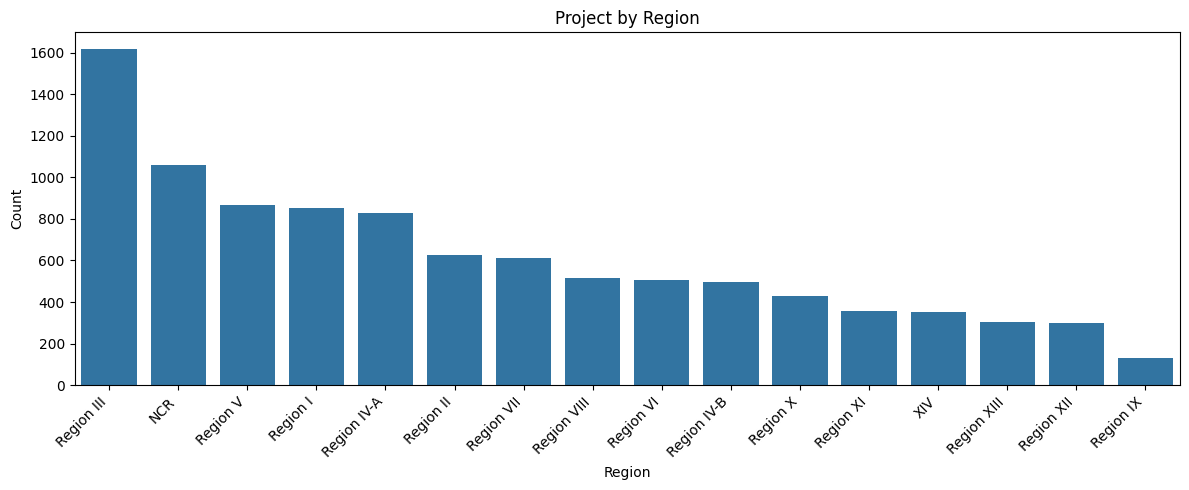

In [47]:
#sample visualization

#Projects per Region
region_count = data['Region'].value_counts().reset_index()
region_count.columns = ['Region', 'Count']

plt.figure(figsize=(12, 5))
sns.barplot(data=region_count, x='Region', y='Count')
plt.xticks(rotation=45, ha='right')
plt.title('Project by Region')
plt.tight_layout()
plt.show()

In [ ]:
duplicate_mask = data.duplicated(subset=["Contractor", "Province", "StartDate", "ActualCompletionDate"], keep=False)
duplicate = data[duplicate_mask].sort_values(by=["Contractor", "Province", "StartDate", "ActualCompletionDate"])

dup_counts = (
    duplicate.groupby(["Contractor"])
    .size()
    .reset_index(name="DuplicateCount")
    .sort_values(by="DuplicateCount", ascending=False)
)

# Only keep true duplicates (count > 1)
dup_counts = dup_counts.head(20)

print("Top 20 Contractor with the most duplicates:")
display(dup_counts.head())


Top 20 Contractor with the most duplicates:


Contractor  DuplicateCount
208                                        QM BUILDERS              37
271  SUNWEST, INC. (FORMERLY: SUNWEST CONSTRUCTION ...              28
158  LEGACY CONSTRUCTION CORPORATION (FORMERLY: LEG...              28
298                                     WAWAO BUILDERS              25
54        CENTERWAYS CONSTRUCTION AND DEVELOPMENT INC.              18
285  TRIPLE 8 CONSTRUCTION & SUPPLY, INC. (FORMERLY...              17
254              SILVERWOLVES CONSTRUCTION CORPORATION              17
297                     W.J.P. CONSTRUCTION AND SUPPLY              17
295           VILLAR GENERAL CONSTRUCTION AND SUPPLIES              17
224  RAMARPLUS INCORPORATED (FORMERLY RAMAR ENTERPR...              16
245  ROYAL CROWN MONARCH CONSTRUCTION & SUPPLIES CORP.              16
22   ALPHA & OMEGA GEN. CONTRACTOR & DEVELOPMENT CORP.              15
179       MEGAPOLITAN BUILDERS AND CONSTRUCTION SUPPLY              14
265               ST. TIMOTHY CONSTRUCTION CORPORATION              13
168  M3 KONSTRACT CORPORATION (FORMERLY:MARGARITA C...              13
66                                 DALCON CONSTRUCTION              13
13                                    ABU CONSTRUCTION              12
29                                  ANORE CONSTRUCTION              12
144                      JORMAND CONSTRUCTION & SUPPLY              11
154                          L.R. TIQUI BUILDERS, INC.              10

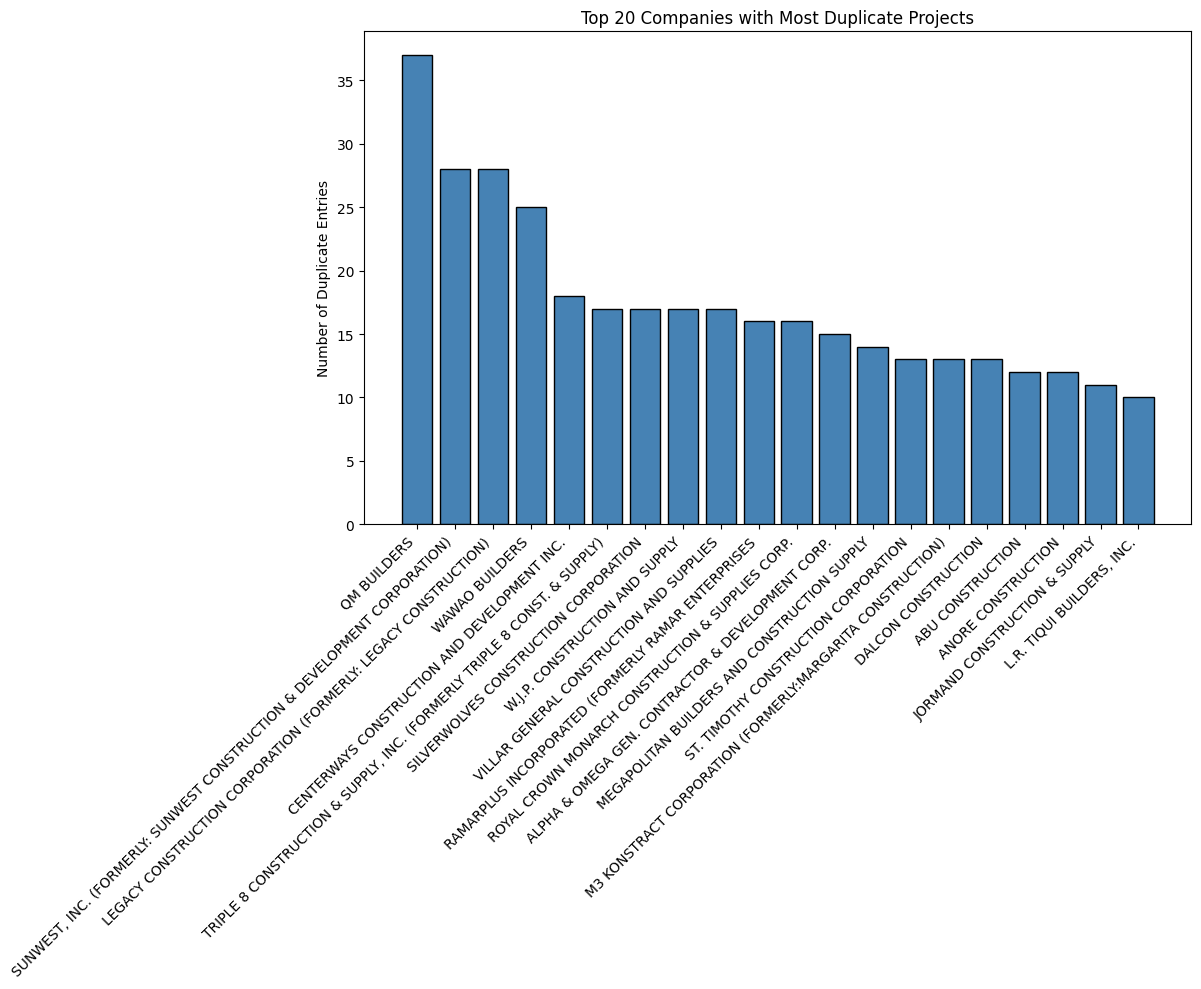

In [42]:
plt.figure(figsize=(12,10))
plt.bar(dup_counts["Contractor"], dup_counts["DuplicateCount"], color="steelblue", edgecolor="black")

plt.title("Top 20 Companies with Most Duplicate Projects")
plt.ylabel("Number of Duplicate Entries")
plt.xticks(rotation=45, ha="right")

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.tight_layout()
plt.show()

In [ ]:
#Another Visualization of the Entire Duplicates

duplicate_mask = data.duplicated(subset=["Contractor", "Province", "StartDate", "ActualCompletionDate"], keep=False)
duplicates = data[duplicate_mask].sort_values(by=["Contractor", "Province", "StartDate"])
duplicates = duplicates.dropna(axis=1, how='all')

print("Detected Duplicate Projects:")
display(duplicates.head())


Detected Duplicate Projects:


Region           Province  \
4785  Region IV-A             Laguna   
4786  Region IV-A             Laguna   
3043   Region III            Bulacan   
3044   Region III            Bulacan   
4000   Region III            Bulacan   
...           ...                ...   
1839     Region I       Ilocos Norte   
7628   Region VII               Cebu   
7629   Region VII               Cebu   
5954    Region IX  Zamboanga del Sur   
5955    Region IX  Zamboanga del Sur   

                                      TypeOfWork  FundingYear  \
4785  Construction of Flood Mitigation Structure         2022   
4786  Construction of Flood Mitigation Structure         2022   
3043  Construction of Flood Mitigation Structure         2024   
3044  Construction of Flood Mitigation Structure         2024   
4000  Construction of Flood Mitigation Structure         2024   
...                                          ...          ...   
1839  Construction of Flood Mitigation Structure         2023   
7628                        Construction of Dike         2023   
7629                        Construction of Dike         2023   
5954  Construction of Flood Mitigation Structure         2024   
5955  Construction of Flood Mitigation Structure         2024   

     ApprovedBudgetForContract ContractCost ActualCompletionDate  StartDate  \
4785                  19600000  19599339.02           12/11/2023   1/9/2023   
4786                  19600000  19597737.55           12/11/2023   1/9/2023   
3043               67549958.68  67549453.28           10/17/2024  2/21/2024   
3044               77199988.14  77199509.85           10/17/2024  2/21/2024   
4000               77199919.57  77199909.53           10/24/2024  2/28/2024   
...                        ...          ...                  ...        ...   
1839               58799830.53  57899998.72            8/15/2023  3/13/2023   
7628               96305251.57  96305249.03           11/21/2023  3/16/2023   
7629                  96112254  96112225.44           11/21/2023  3/16/2023   
5954                  14700000  14679957.15            4/29/2025   5/9/2024   
5955                  14700000  14679922.81            4/29/2025   5/9/2024   

                                             Contractor ContractId  \
4785  11 DIAMOND EAGLE CONSTRUCTION CORPORATION (FOR...   22DI0152   
4786  11 DIAMOND EAGLE CONSTRUCTION CORPORATION (FOR...   22DI0151   
3043                                 11-16 CONSTRUCTION   24CC0140   
3044                                 11-16 CONSTRUCTION   24CC0141   
4000                                 11-16 CONSTRUCTION   24CC0181   
...                                                 ...        ...   
1839  ZEDIK BUILDERS / MEGAPOLITAN BUILDERS AND CONS...   23AA0108   
7628  ZLREJ TRADING AND CONSTRUCTION CORPORATION / G...   23HO0121   
7629  ZLREJ TRADING AND CONSTRUCTION CORPORATION / G...   23HO0133   
5954  ZMS CONST. & DEV. CORP. (FORMERLY:ZMS CONSTRUC...   24JG0042   
5955  ZMS CONST. & DEV. CORP. (FORMERLY:ZMS CONSTRUC...   24JG0043   

        ProjectId  
4785  P00631300LZ  
4786  P00631301LZ  
3043  P00823465LZ  
3044  P00823466LZ  
4000  P00823356LZ  
...           ...  
1839  P00725608LZ  
7628  P00721875VS  
7629  P00721876VS  
5954  P00821215MN  
5955  P00821216MN  

[1269 rows x 11 columns]

C:\Users\John Earl\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


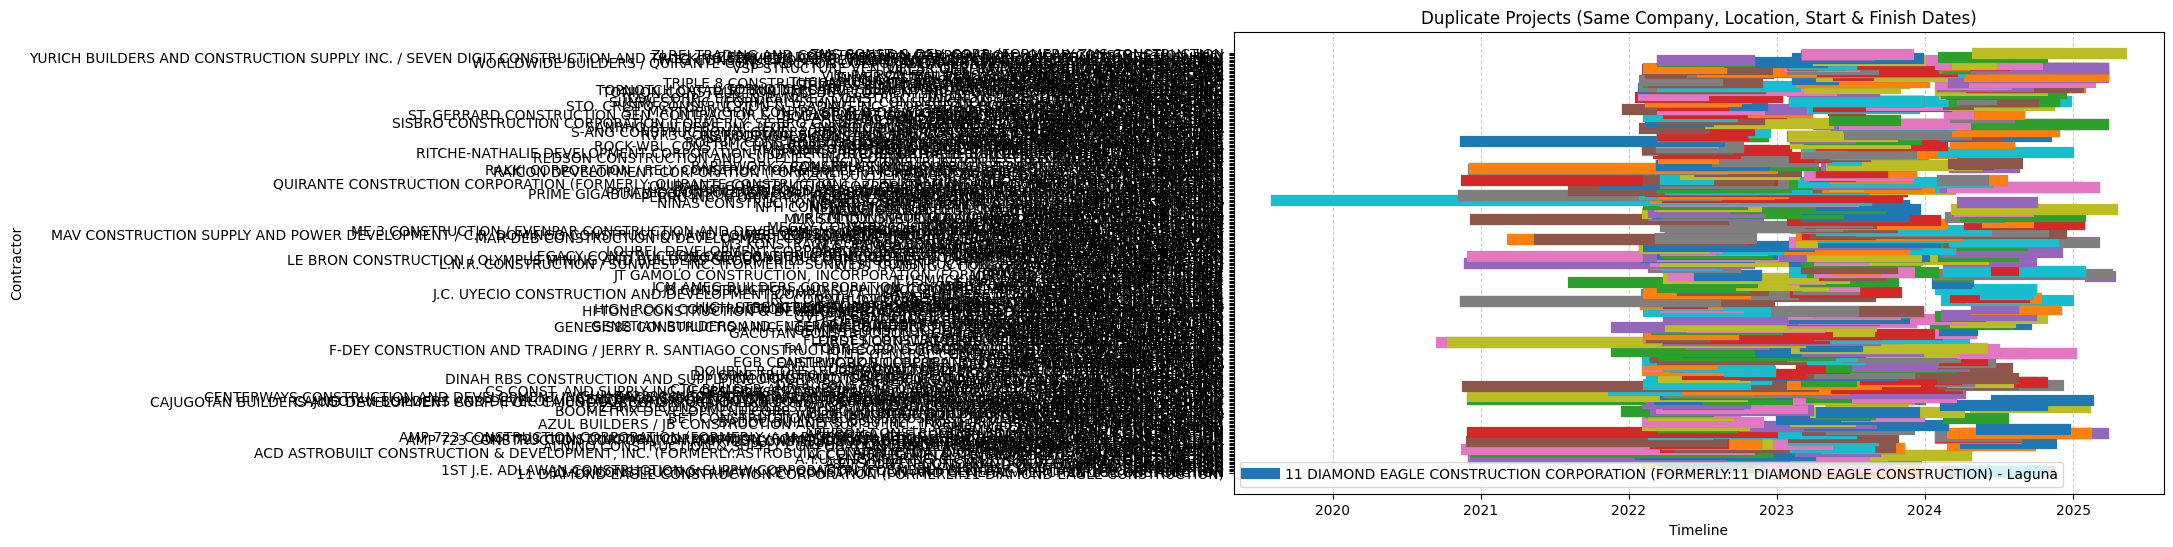

In [34]:
plt.figure(figsize=(12, 6))

for idx, row in duplicates.iterrows():
    plt.plot([row["StartDate"], row["ActualCompletionDate"]],
             [row["Contractor"], row["Contractor"]],
             linewidth=8,
             label=f'{row["Contractor"]} - {row["Province"]}' if idx == duplicates.index[0] else "")

plt.title("Duplicate Projects (Same Company, Location, Start & Finish Dates)")
plt.xlabel("Timeline")
plt.ylabel("Contractor")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.legend()
contractor_counts = data['Contractor'].value_counts().head(10).reset_index()
contractor_counts.columns = ['Contractor', 'Project Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=contractor_counts, x='Project Count', y='Contractor')
plt.title('Top 10 Contractors by Number of Projects (Overall)')
plt.xlabel('Number of Projects')
plt.ylabel('Contractor')
plt.tight_layout()
plt.show()

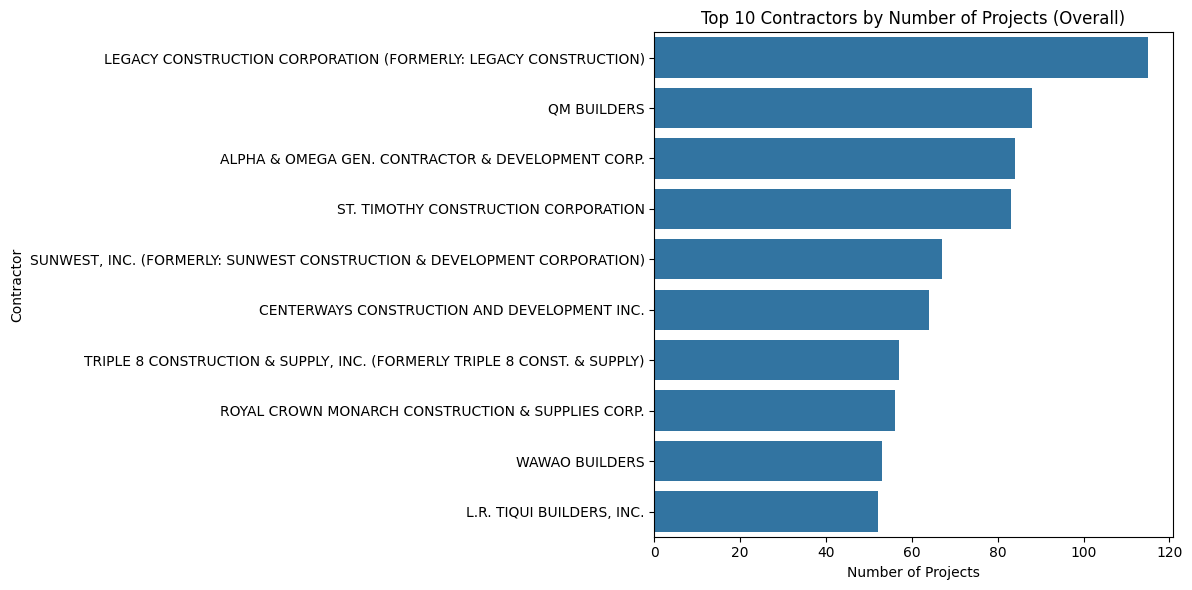

In [9]:
contractor_counts = data['Contractor'].value_counts().head(10).reset_index()
contractor_counts.columns = ['Contractor', 'Project Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=contractor_counts, x='Project Count', y='Contractor')
plt.title('Top 10 Contractors by Number of Projects (Overall)')
plt.xlabel('Number of Projects')
plt.ylabel('Contractor')
plt.tight_layout()
plt.show()

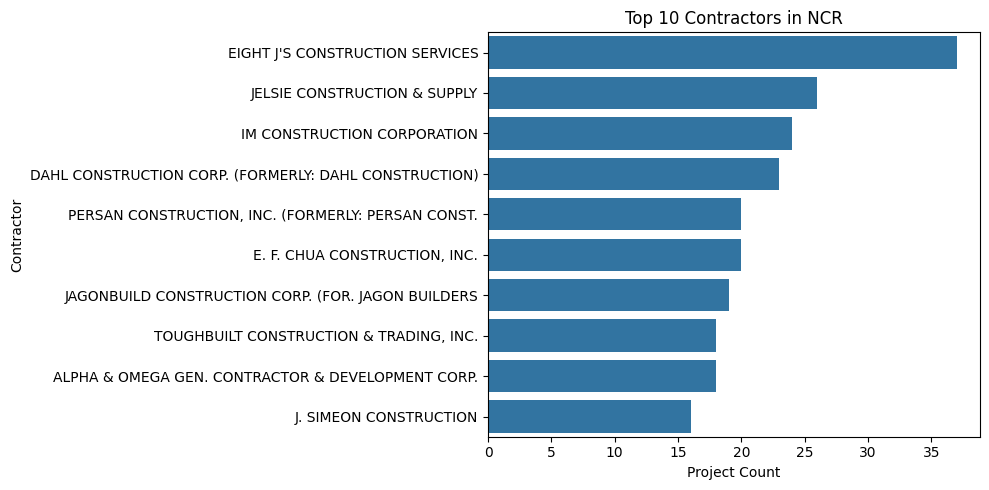

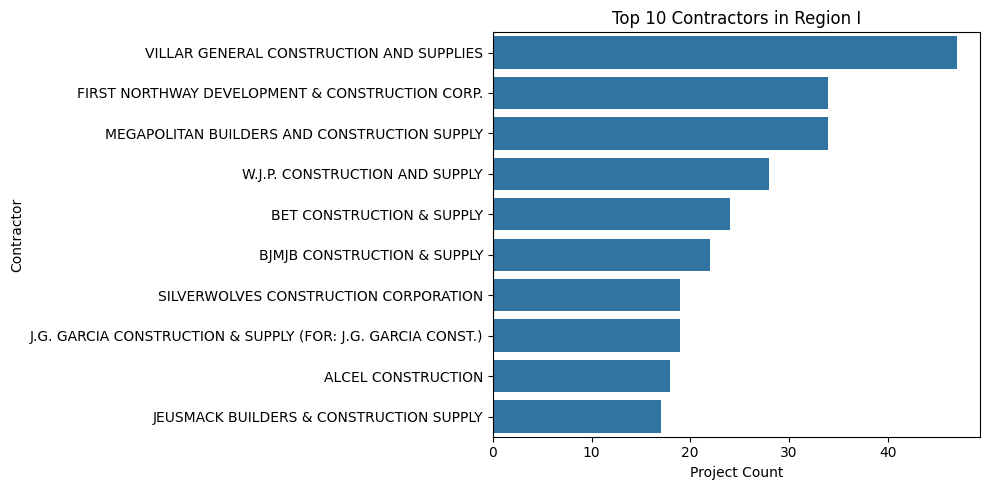

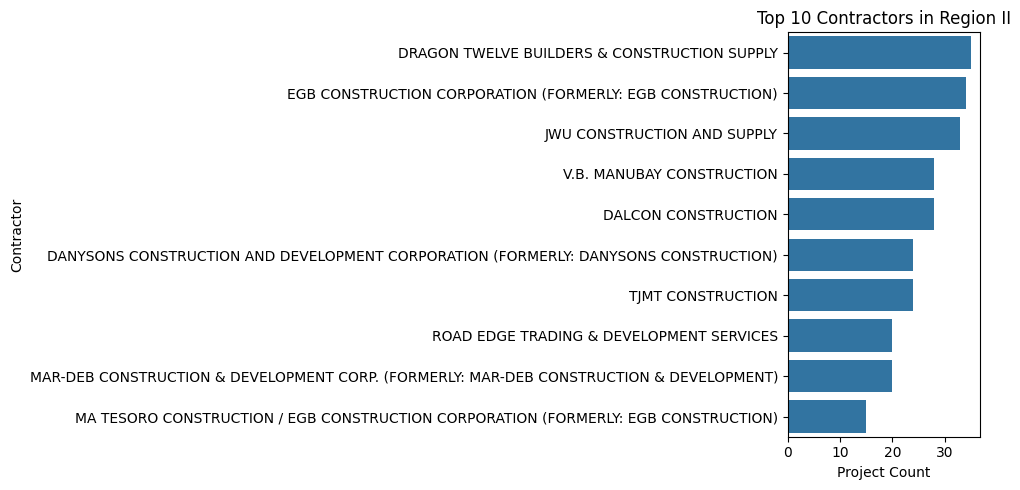

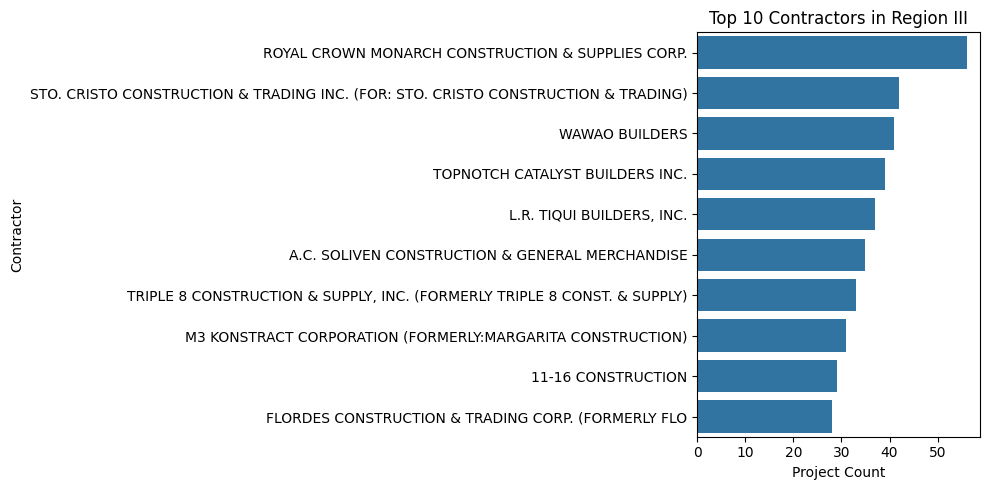

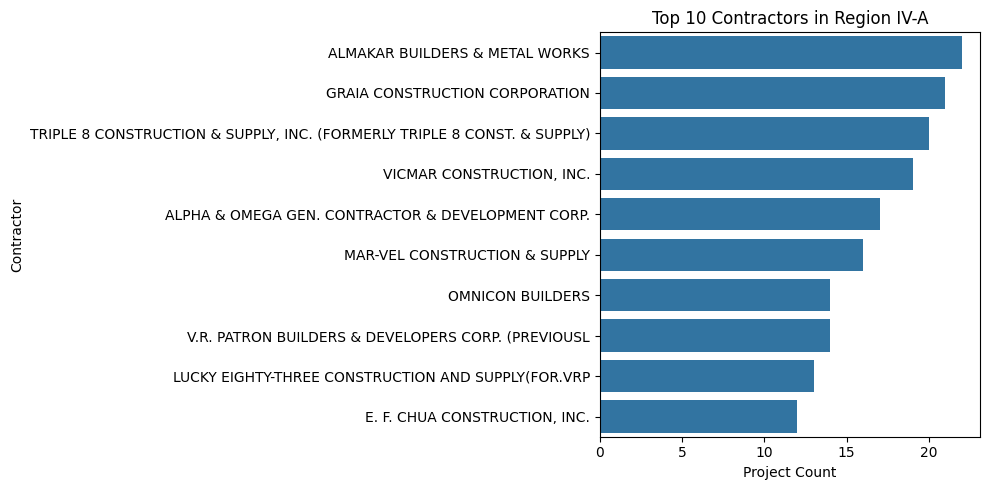

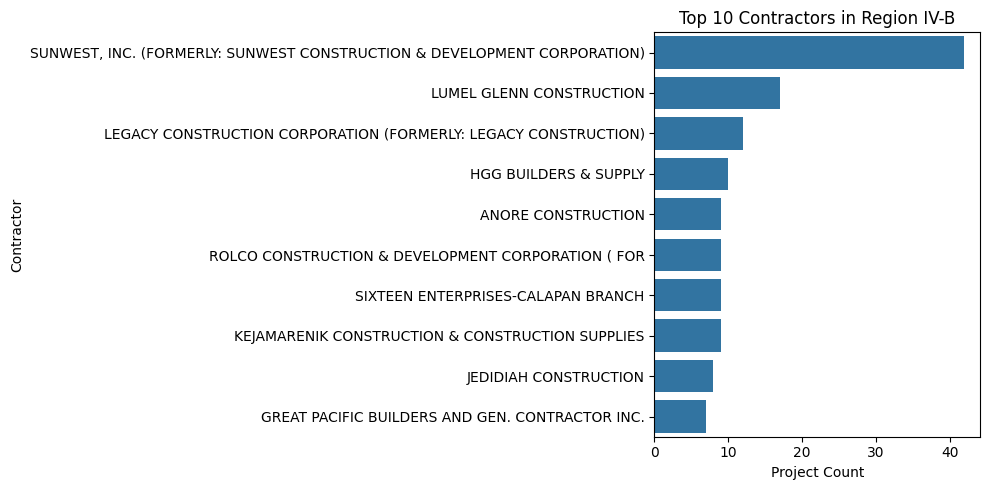

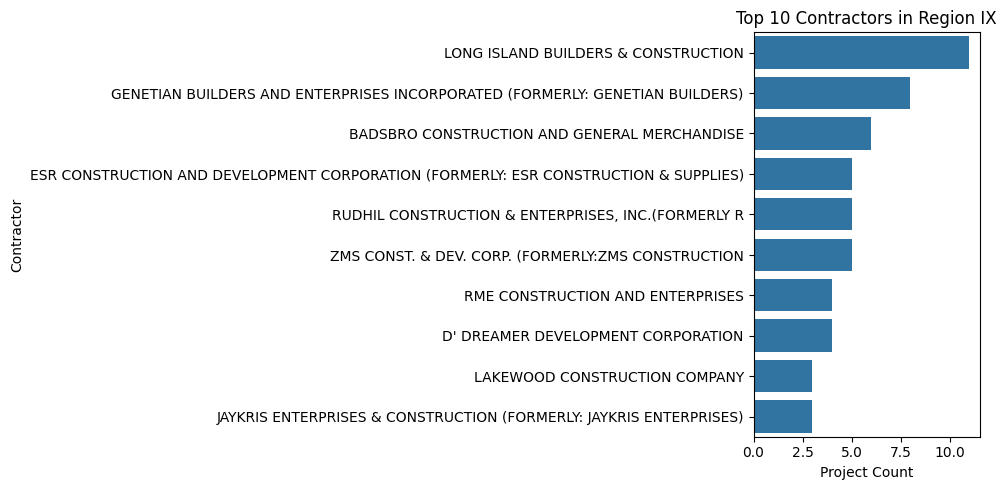

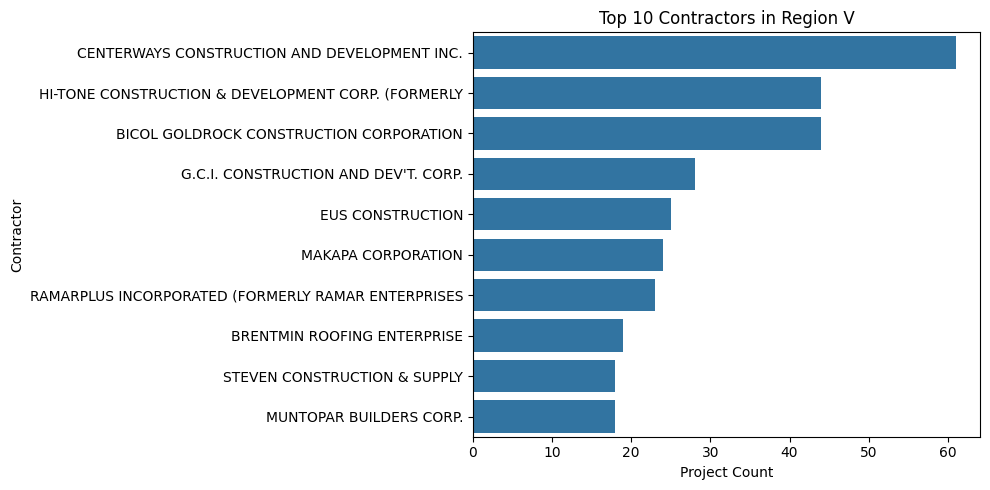

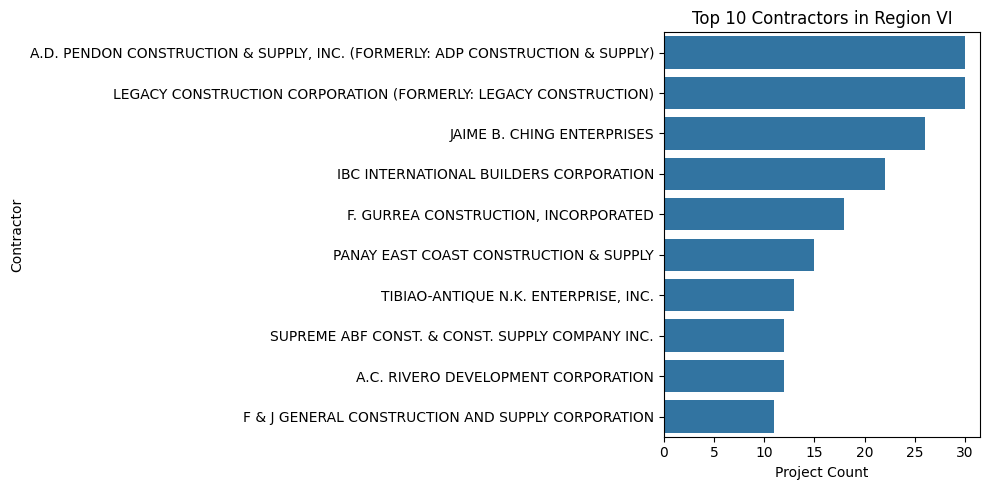

C:\Users\Aliyah Khaet\AppData\Local\Temp\ipykernel_4212\487908728.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


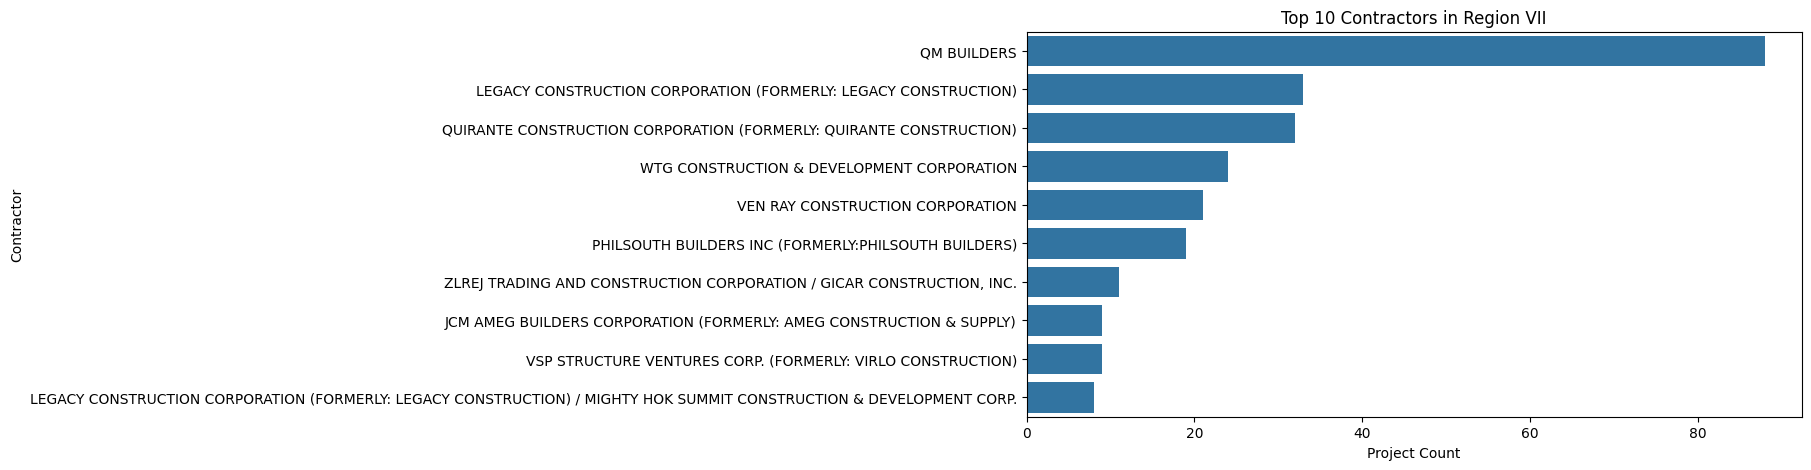

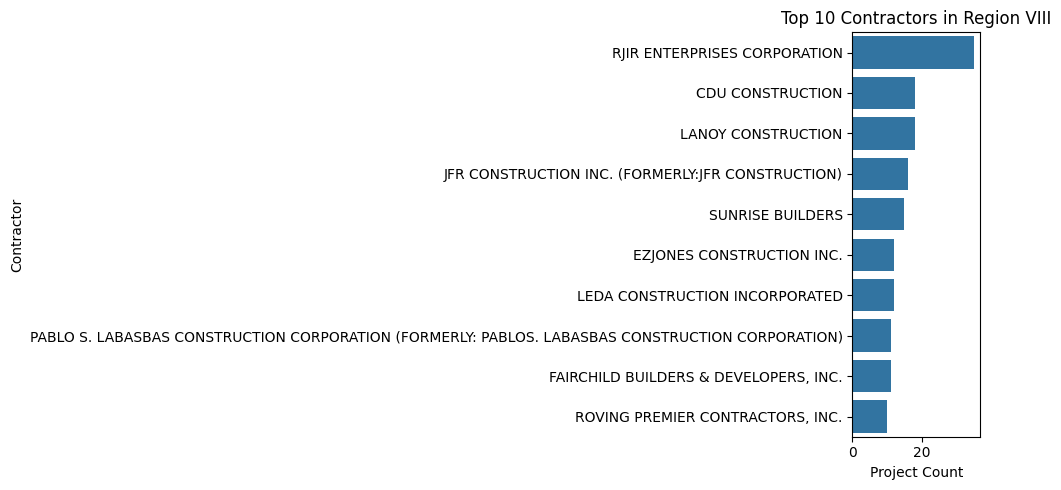

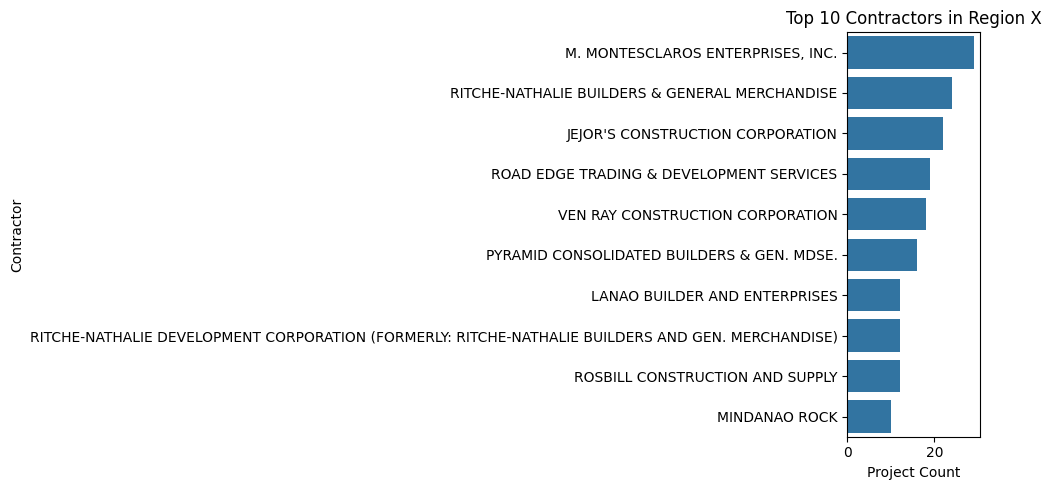

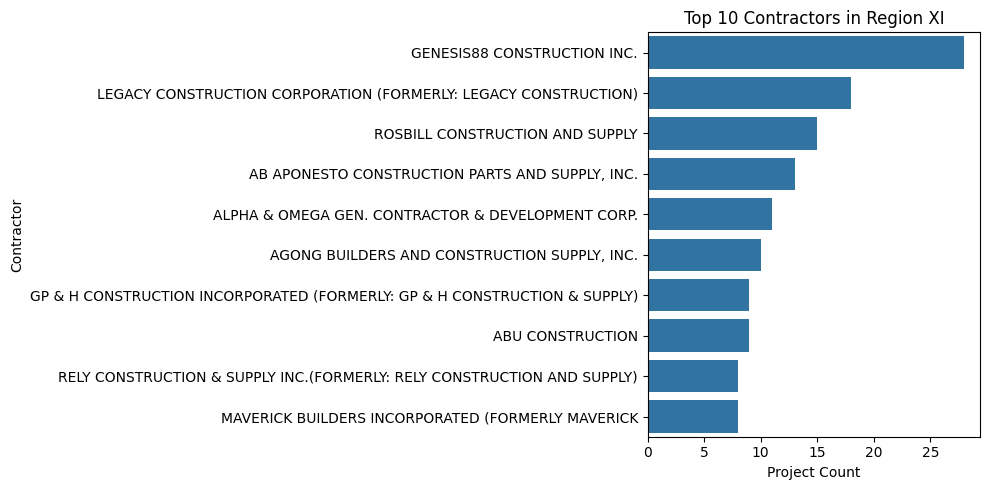

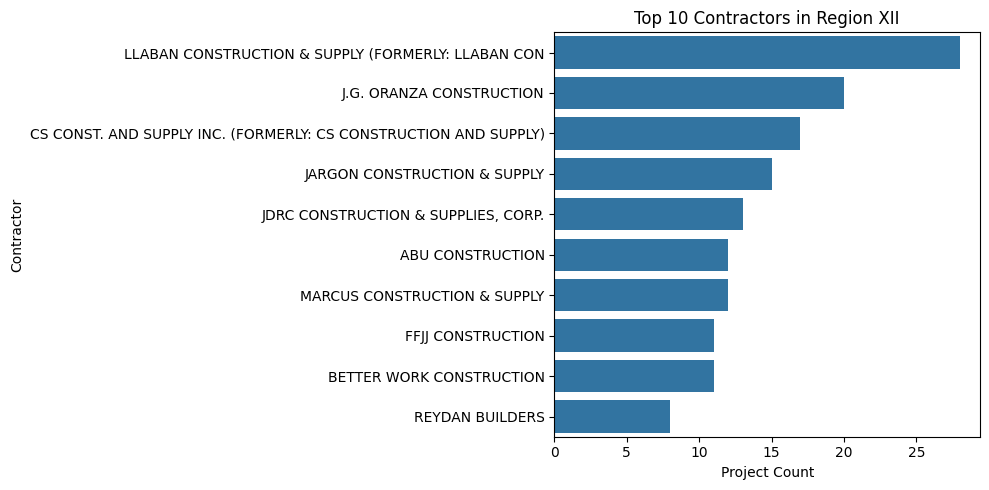

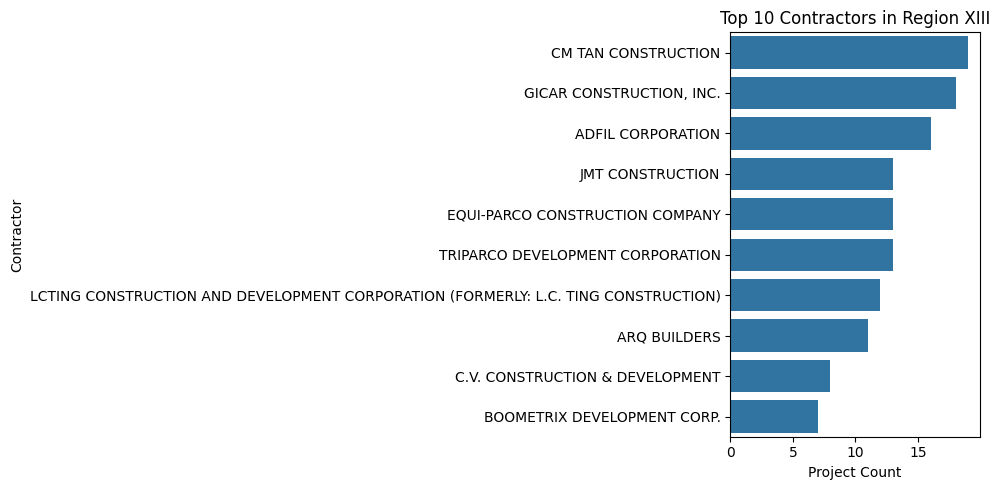

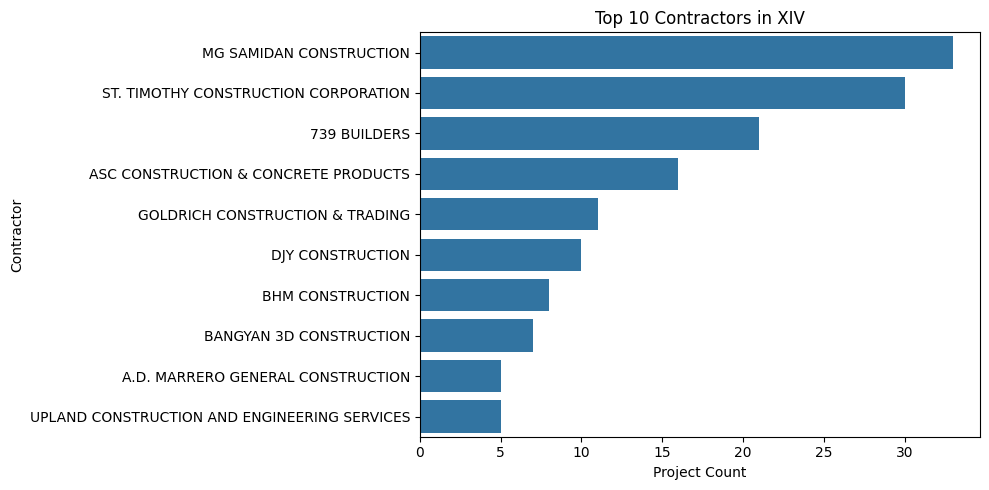

In [ ]:
regions = sorted(data['Region'].unique())

for region in regions:
    df_region = data[data['Region'] == region]
    top_contractors = df_region['Contractor'].value_counts().head(10).reset_index()
    top_contractors.columns = ['Contractor', 'Project Count']
    
    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_contractors, y='Contractor', x='Project Count')  
    plt.title(f"Top 10 Contractors in {region}")
    plt.tight_layout()
    plt.show()

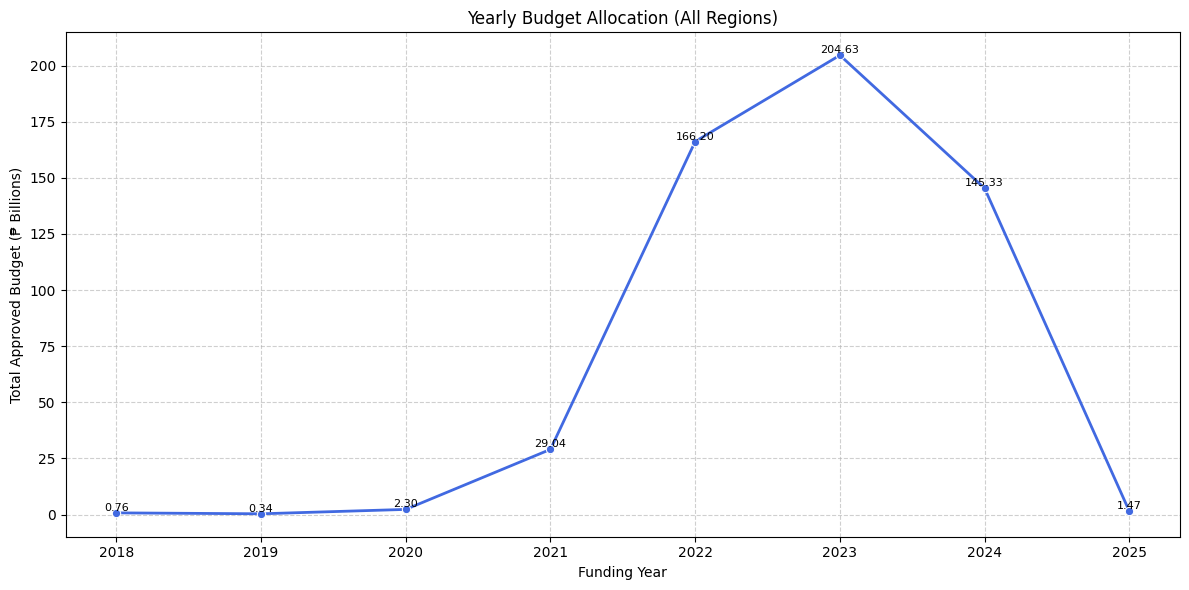

In [36]:
# sample visualization no. 2
# Yearly Budget Allocation (All Regions)


# Identify and handle the outlier in the dataset.
# Assuming the outlier is in 2021 for Region VIII with an unusually high budget.
outlier_threshold = 100 * 1e9 
outlier_mask = (data['FundingYear'] == 2021) & (data['Region'] == 'Region VIII') & (data['ApprovedBudgetForContract'] > outlier_threshold)

# Replace the erroneous value with NaN, ensuring it is ignored in the sum() calculation.
if outlier_mask.any():
    data.loc[outlier_mask, 'ApprovedBudgetForContract'] = np.nan
    data['ApprovedBudgetForContract'] = data['ApprovedBudgetForContract'].fillna(0)

yearly_budget = data.groupby("FundingYear")["ApprovedBudgetForContract"].sum().reset_index()

yearly_budget["Budget_Billion"] = yearly_budget["ApprovedBudgetForContract"] / 1e9

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_budget, x="FundingYear", y="Budget_Billion", marker="o", linewidth=2, color="royalblue")

for x, y in zip(yearly_budget["FundingYear"], yearly_budget["Budget_Billion"]):
        plt.text(x, y, f"{y:.2f}", ha="center", va="bottom", fontsize=8)

plt.xlabel("Funding Year")
plt.ylabel("Total Approved Budget (₱ Billions)")
plt.title("Yearly Budget Allocation (All Regions)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show() # savefig() for non-interactive environments
#plt.savefig("yearly_budget_all_regions.png")

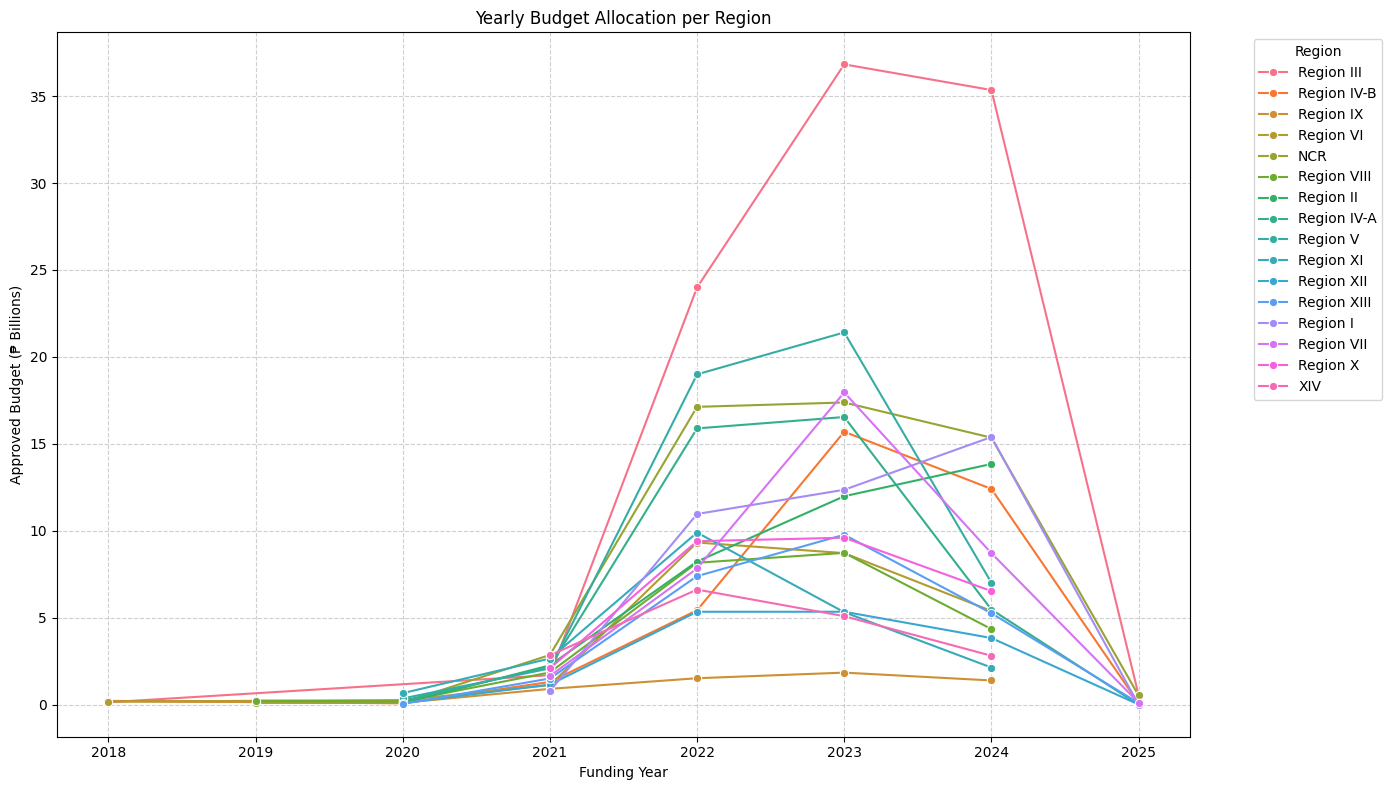

In [38]:
# sample visualization no. 3
# yearly budget allocation per region
yearly_region_budget = (
    data.groupby(["FundingYear", "Region"])["ApprovedBudgetForContract"]
    .sum()
    .reset_index()
)


yearly_region_budget["Budget_Billion"] = yearly_region_budget["ApprovedBudgetForContract"] / 1e9

plt.figure(figsize=(14,8))
sns.lineplot(
    data=yearly_region_budget,
    x="FundingYear",
    y="Budget_Billion",
    hue="Region",
    marker="o"
)

plt.title("Yearly Budget Allocation per Region")
plt.xlabel("Funding Year")
plt.ylabel("Approved Budget (₱ Billions)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show() # Use savefig() for non-interactive environments
#plt.savefig("yearly_budget_per_region.png")

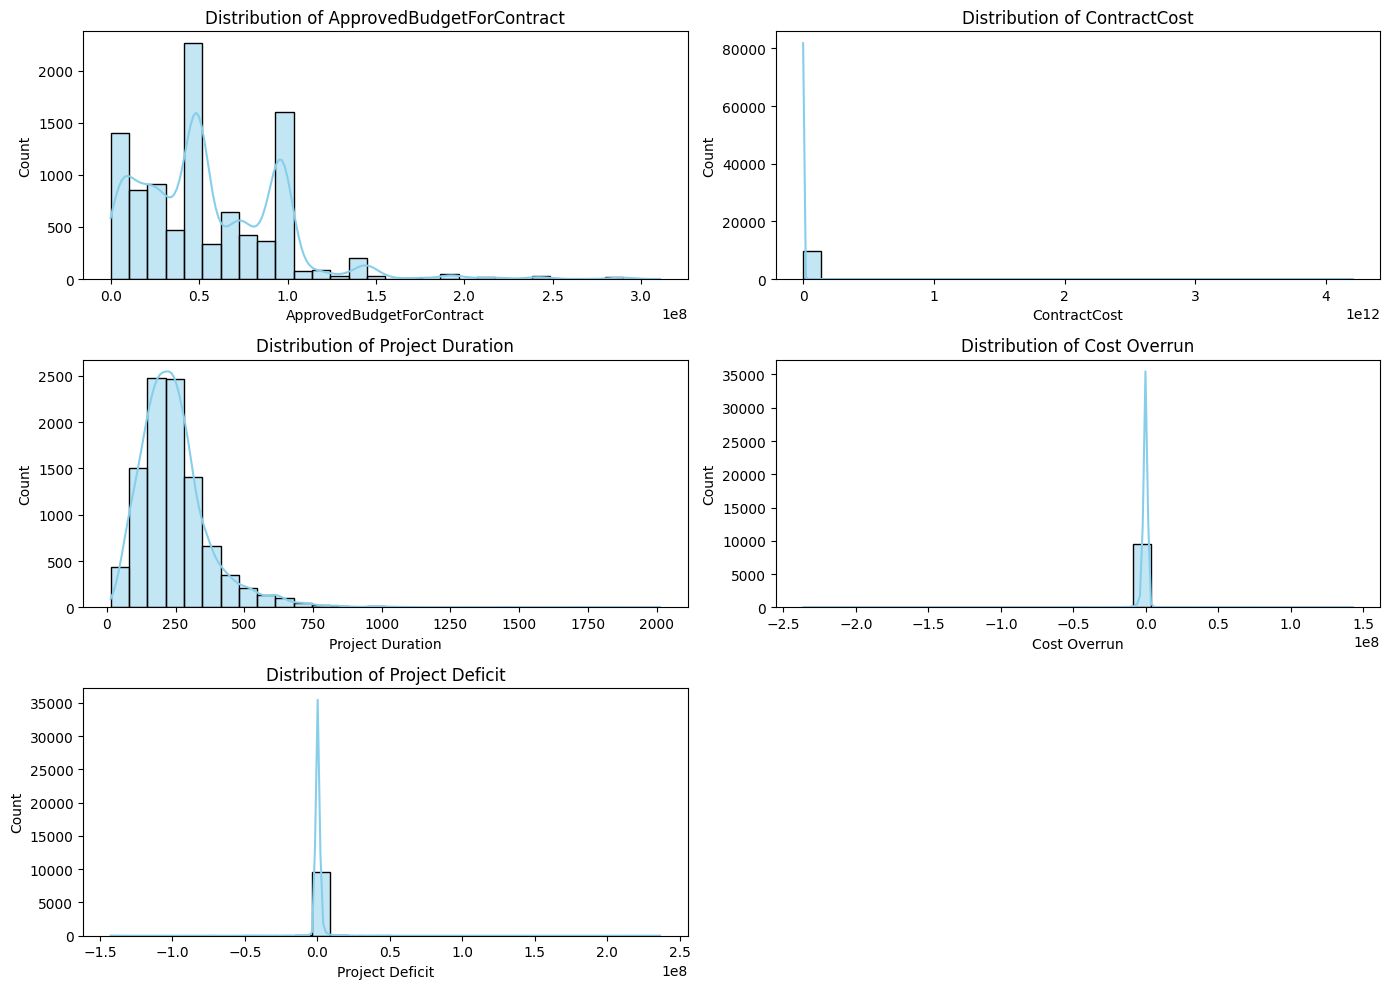

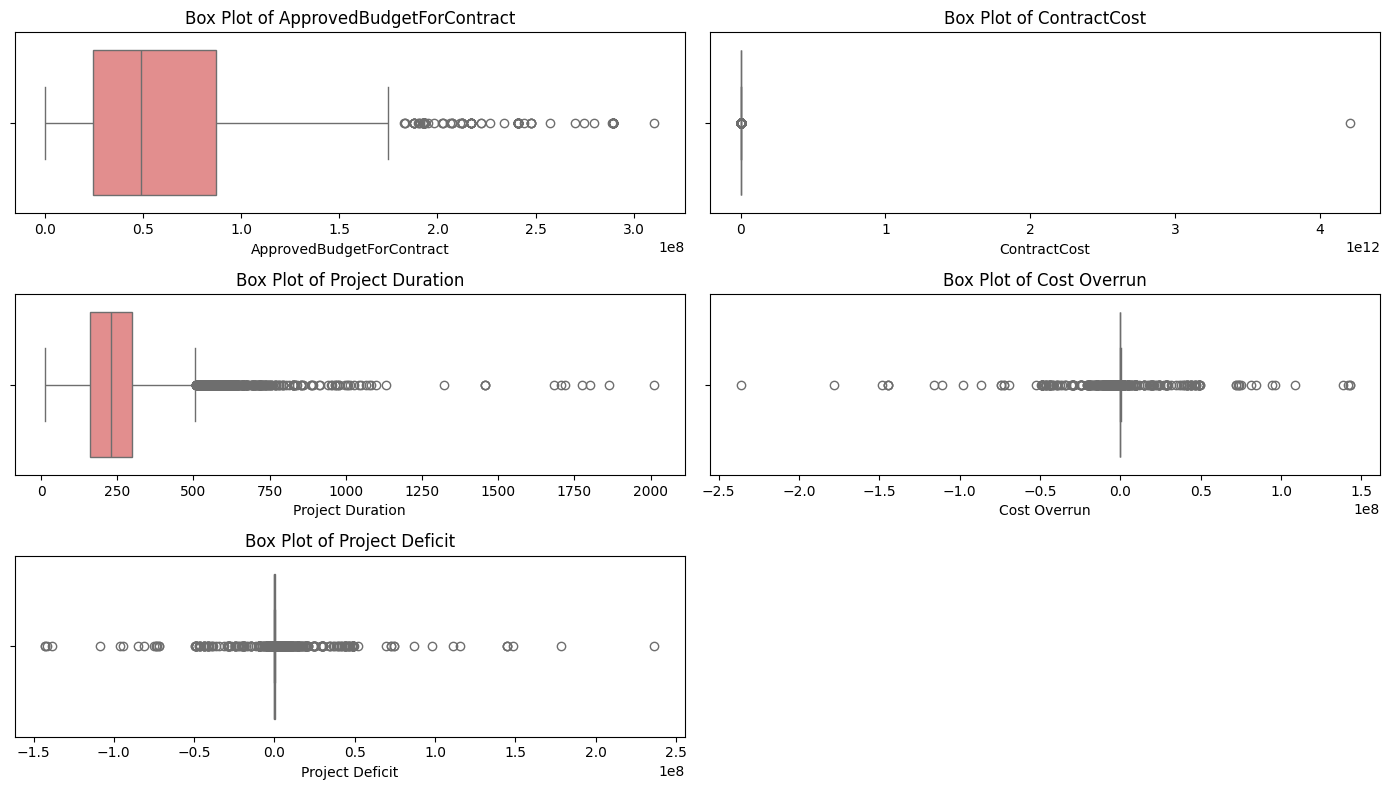

Correlation Matrix:


ApprovedBudgetForContract  ContractCost  \
ApprovedBudgetForContract                   1.000000     -0.013004   
ContractCost                               -0.013004      1.000000   
Project Duration                            0.272349      0.032690   
Cost Overrun                               -0.203511      0.000569   
Project Deficit                             0.203511     -0.000569   
FundingYear                                 0.110859     -0.019262   

                           Project Duration  Cost Overrun  Project Deficit  \
ApprovedBudgetForContract          0.272349     -0.203511         0.203511   
ContractCost                       0.032690      0.000569        -0.000569   
Project Duration                   1.000000     -0.033937         0.033937   
Cost Overrun                      -0.033937      1.000000        -1.000000   
Project Deficit                    0.033937     -1.000000         1.000000   
FundingYear                       -0.398583      0.022578        -0.022578   

                           FundingYear  
ApprovedBudgetForContract     0.110859  
ContractCost                 -0.019262  
Project Duration             -0.398583  
Cost Overrun                  0.022578  
Project Deficit              -0.022578  
FundingYear                   1.000000

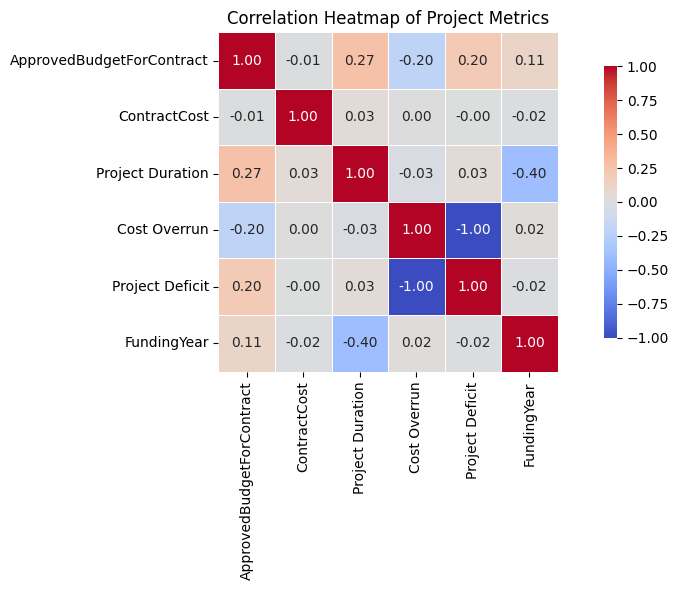

In [39]:
#Histogram

numeric_cols = [
    'ApprovedBudgetForContract',
    'ContractCost',
    'Project Duration',
    'Cost Overrun',
    'Project Deficit'
]

# HISTOGRAMS
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# BOX PLOTS
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

#Correlation Analysis

corr_data = data[numeric_cols + ['FundingYear']].corr()

# CORRELATION MATRIX
print("Correlation Matrix:")
display(corr_data)

# HEATMAP
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_data,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Project Metrics")
plt.tight_layout()
plt.show()